In [2]:
### Read in experimental parameters from plate plan file
### Create lists of column & row names, enzyme names, enzyme & substrate conc 
### Convert units to standard units (molar and min^-1)
### Calculate e_405 for nitrophenol at given pH

import pandas as pd
#!wget https://raw.githubusercontent.com/blinkletter/StealThisCode/main/BiochemToolbox.py
#!pip install uncertainties  # to install 'Uncertainties' package in Colab. 
import BiochemToolbox as BT
import numpy as np

file_location = ""
file_name = "PlatePlan0_setup.csv"
pH = 7.0

df, plate, e_NPA = BT.read_plate_setup(file_location+file_name, pH)

print(plate.keys())


dict_keys(['row_name_list', 'S_conc_list', 'lane_name_list', 'E_conc_list', 'E_Name_list'])


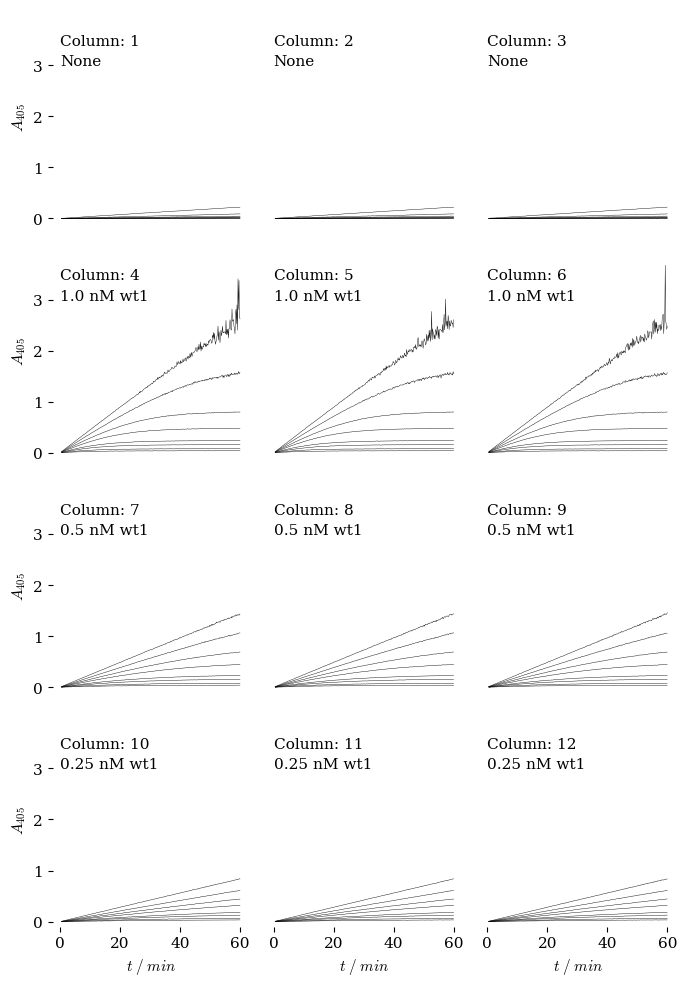

Plot saved as plot_contact_sheet.pdf


()

In [2]:
### Contact sheet. Ticks deleted on plots inside the set.
#!wget https://raw.githubusercontent.com/blinkletter/StealThisCode/main/BiochemToolbox.py
#!pip install uncertainties  # to install 'Uncertainties' package in Colab. 
import BiochemToolbox as BT

BT.contact_sheet("data1/data", 
                 columns = plate["lane_name_list"],
                 rows = plate["row_name_list"],
                 enzymes = plate["E_Name_list"],
                 fancy = True)

,Column,Row,slope,slope stderr,int,int stderr,RSQ
0,1,A,0.000024,0.000010,0.000157,0.000177,0.030433
1,1,B,0.000086,0.000009,-0.000228,0.000159,0.338264
2,1,C,0.000138,0.000009,0.000062,0.000160,0.567253
3,1,D,0.000217,0.000009,0.000103,0.000162,0.757405
4,1,E,0.000445,0.000009,0.000149,0.000162,0.929754
5,1,F,0.000759,0.000009,-0.000119,0.000158,0.975709
6,1,G,0.001496,0.000010,0.000015,0.000171,0.992614
7,1,H,0.003723,0.000010,0.000435,0.000168,0.998833
8,2,A,0.000024,0.000010,0.000197,0.000171,0.031879
9,2,B,0.000073,0.000010,0.000056,0.000177,0.226395


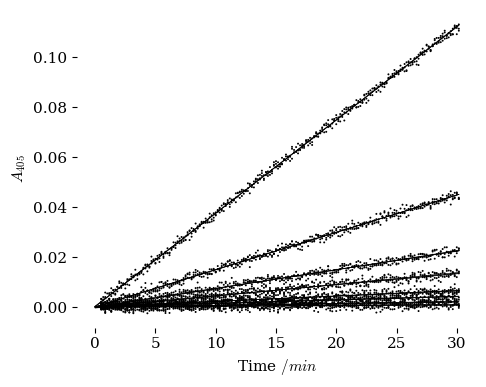

Plot saved as data1/data.pdf
Data saved as data1/data.csv


In [7]:
### Plot initial rates for a well or a set of wells

#!wget https://raw.githubusercontent.com/blinkletter/StealThisCode/main/BiochemToolbox.py
#!pip install uncertainties  # to install 'Uncertainties' package in Colab. 
import BiochemToolbox as BT

### get plate info from plate plan file
df, plate, e_NPA = BT.read_plate_setup("PlatePlan0_setup.csv", pH = 7.0)

### Chose columns to plot
Column_list = ["1","2","3"]
#Column_list = ["4", "5", "6"]
#Column_list = plate["lane_name_list"]

### Chose rows within the columns
#Row_list = ["A","B","C"]
Row_list = ["B"]
Row_list = plate["row_name_list"]

plate_name_list = ["plate1"]

for plate_name in plate_name_list:
    data_file_root_name = "data1/" + plate_name
    result = BT.plot_lanes(data_file_root_name, 
                           Column_list, Row_list, 
                           Fraction_time_span = .5, 
                           Line_Fit = True,
                           Display_Plot = True,
                           Display_Data = True,
                           fancy = True,
                           tiny_points = True,
                           tiny_line = False
                           )

slope = 0.00368 +/- 3.77e-06


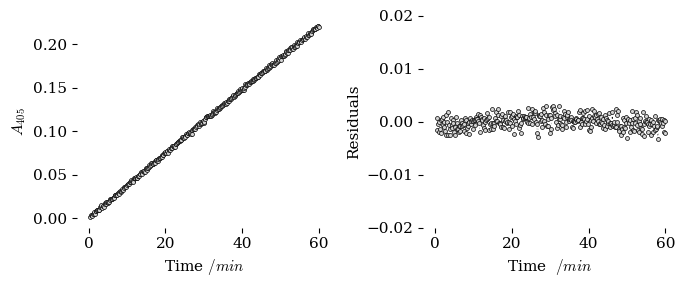

Plot saved as plot1/Cell_w_residuals_2_H.pdf


()

In [11]:
### Analysis of a single cell with slope and differentials

#!wget https://raw.githubusercontent.com/blinkletter/StealThisCode/main/BiochemToolbox.py
#!pip install uncertainties  # to install 'Uncertainties' package in Colab. 
import BiochemToolbox as BT

data_name = "data1/data"
BT.dual_plot_w_residuals(data_name, "2", "H", 
                      Fraction_time_span = 1,
                      plot_file = "plot1/Cell_w_residuals",
                      fancy = True)

slope = 0.00541 +/- 5.07e-05
slope = 0.00642 +/- 0.000357


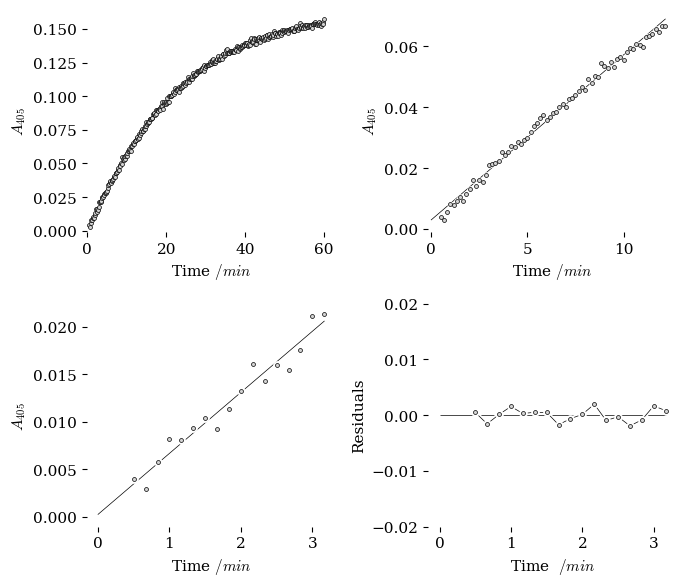

Plot saved as plot1/Cell_w_residuals_7_C.pdf


()

In [3]:
### Analysis of a single cell with slope and differentials

#!wget https://raw.githubusercontent.com/blinkletter/StealThisCode/main/BiochemToolbox.py
#!pip install uncertainties  # to install 'Uncertainties' package in Colab. 
import BiochemToolbox as BT

lane_name = "7"
row_name = "C"
data_name = "data1/data"

BT.plot_four_w_residuals(data_name, lane_name, row_name, 
                         Fraction_time_span_medium = 0.2,
                         Fraction_time_span_short = 0.05,
                         plot_file = "plot1/Cell_w_residuals",
                         fancy=True)